In [2]:
import tensorflow
from tensorflow import keras

In [3]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),
 (imagens_test, identificacoes_test)) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
len(imagens_treino)

60000

In [6]:
imagens_treino.shape

(60000, 28, 28)

In [7]:
len(imagens_test)

10000

In [8]:
imagens_test.shape

(10000, 28, 28)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

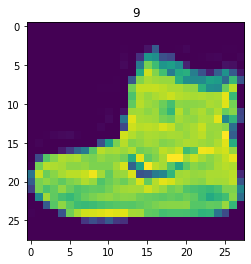

In [10]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

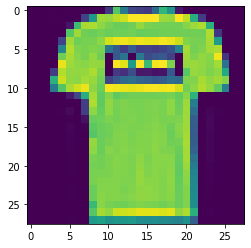

In [11]:
plt.imshow(imagens_treino[1])

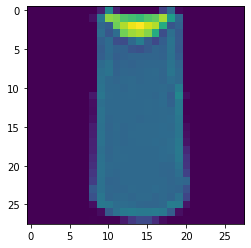

In [12]:
plt.imshow(imagens_treino[2])

In [13]:
print('Menor identificador: ', identificacoes_treino.min())
print('Maior identificador: ', identificacoes_treino.max())

Menor identificador:  0
Maior identificador:  9


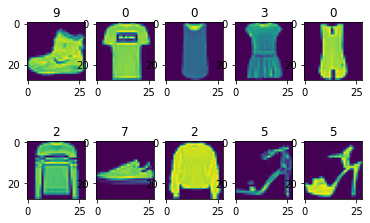

In [14]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(identificacoes_treino[imagem])

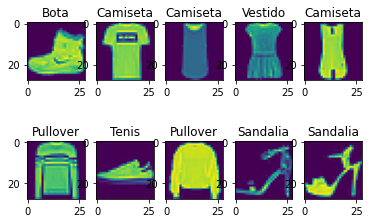

In [15]:
nomes_de_classificacoes = [
    'Camiseta', 'Calca', 'Pullover', 'Vestido', 'Casaco', 'Sandalia',
    'Camisa', 'Tenis', 'Bolsa', 'Bota'
]
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

In [51]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5,
           validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.1190 - accuracy: 0.7561 - val_loss: 0.6006 - val_accuracy: 0.7878
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5403 - accuracy: 0.8186 - val_loss: 0.5544 - val_accuracy: 0.8077
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4763 - accuracy: 0.8333 - val_loss: 0.4965 - val_accuracy: 0.8298
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4397 - accuracy: 0.8417 - val_loss: 0.4522 - val_accuracy: 0.8257
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4149 - accuracy: 0.8507 - val_loss: 0.4401 - val_accuracy: 0.8418


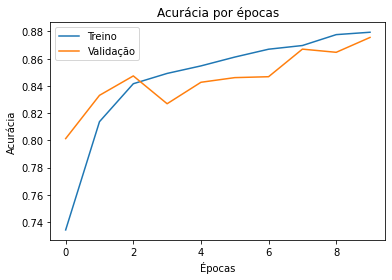

In [73]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

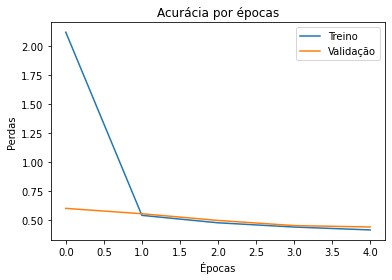

In [71]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

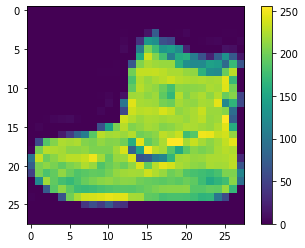

In [64]:
total_de_classificadores = 10
nomes_de_classificacoes = [
    'Camiseta', 'Calca', 'Pullover', 'Vestido', 'Casaco', 'Sandalia',
    'Camisa', 'Tenis', 'Bolsa', 'Bota'
]

plt.imshow(imagens_treino[0])
plt.colorbar()

In [65]:
teste = modelo.predict(imagens_test)

In [66]:
import numpy as np
print('Resultado teste', np.argmax(teste[0]))
print('Número da imagem de teste: ', identificacoes_test[0])

Resultado teste 9
Número da imagem de teste:  9


In [67]:
for i in range(1,5):
    print('Resultado teste', np.argmax(teste[i]))
    print('Número da imagem de teste: ', identificacoes_test[i])
    print('\n')

Resultado teste 2
Número da imagem de teste:  2


Resultado teste 1
Número da imagem de teste:  1


Resultado teste 1
Número da imagem de teste:  1


Resultado teste 6
Número da imagem de teste:  6




In [68]:
for i in range(50,55):
    print('Resultado teste', np.argmax(teste[i]))
    print('Número da imagem de teste: ', identificacoes_test[i])
    print('\n')

Resultado teste 6
Número da imagem de teste:  4


Resultado teste 2
Número da imagem de teste:  4


Resultado teste 5
Número da imagem de teste:  5


Resultado teste 8
Número da imagem de teste:  8


Resultado teste 2
Número da imagem de teste:  2




In [69]:
perda_test, acuracia_test = modelo.evaluate(imagens_test, identificacoes_test)
print('Valor da perda no teste: %.4f ' % perda_test)
print('Valor da acuracia no teste: %.4f' % acuracia_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4727 - accuracy: 0.8331
Valor da perda no teste: 0.4727 
Valor da acuracia no teste: 0.8331


In [72]:
# alterando a quantidade de época de 5 para 10
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 10,
           validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5714 - accuracy: 0.7343 - val_loss: 0.5659 - val_accuracy: 0.8013
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5317 - accuracy: 0.8138 - val_loss: 0.4928 - val_accuracy: 0.8331
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4490 - accuracy: 0.8416 - val_loss: 0.4488 - val_accuracy: 0.8473
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4172 - accuracy: 0.8492 - val_loss: 0.5398 - val_accuracy: 0.8269
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4063 - accuracy: 0.8547 - val_loss: 0.4404 - val_accuracy: 0.8427
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3853 - accuracy: 0.8612 - val_loss: 0.4432 - val_accuracy: 0.8461
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3645 - accuracy: 0.8669 - val_loss: 0.4366 - val_accuracy:

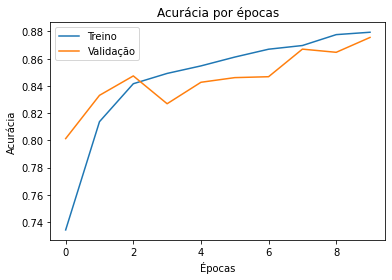

In [74]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

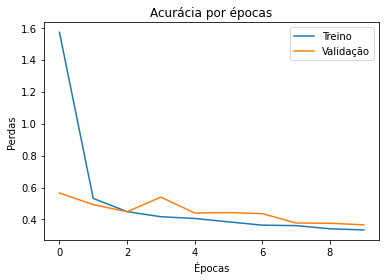

In [75]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

In [76]:
# realizando mais um teste de normalização
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5,
           validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.8802 - accuracy: 0.4823 - val_loss: 1.1750 - val_accuracy: 0.5639
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1120 - accuracy: 0.5679 - val_loss: 0.7766 - val_accuracy: 0.6996
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8051 - accuracy: 0.6802 - val_loss: 0.6209 - val_accuracy: 0.7320
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6990 - accuracy: 0.7383 - val_loss: 0.5428 - val_accuracy: 0.8093
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6246 - accuracy: 0.7738 - val_loss: 0.5095 - val_accuracy: 0.8242


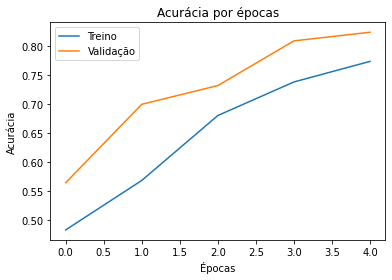

In [77]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

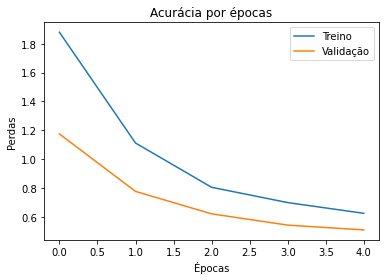

In [78]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

### podemos ver que o segundo modelo sai do overfiting

In [79]:
# salvando modelo
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [82]:
testes = modelo.predict(imagens_test)
testes_modelo_salvo = modelo_salvo.predict(imagens_test)
for i in range(1,5):
    print('Resultado teste: ', np.argmax(testes[i]))
    print('Número da imagem de teste: ', identificacoes_test[i])
    print('Resultado teste MODELO SALVO: ', np.argmax(testes_modelo_salvo[i]))
    print('Número da imagem de teste: ', identificacoes_test[i])
    print('\n')

Resultado teste:  2
Número da imagem de teste:  2
Resultado teste MODELO SALVO:  2
Número da imagem de teste:  2


Resultado teste:  1
Número da imagem de teste:  1
Resultado teste MODELO SALVO:  1
Número da imagem de teste:  1


Resultado teste:  1
Número da imagem de teste:  1
Resultado teste MODELO SALVO:  1
Número da imagem de teste:  1


Resultado teste:  2
Número da imagem de teste:  6
Resultado teste MODELO SALVO:  2
Número da imagem de teste:  6


